**In this notebook we will take a look at debugging/optimizing machine learning model**  

**If you don't see it live you can ignore the rest of this cell :)**

**Quick question**
- Do you want me to focus mostly on the debugging itself and how it's done?
- Do you want me to carry the workshop out as if you were just introduced to machine learning?

**Quick announcement**
- If at any point something I say does not make sense, please let me know we have plenty of time :)

# Agenda for today
- 1. Intro to me, the notebook and briefly about the Debugging
- 2. High Level Debugging example TextBlob
- 3. Test set / Train set separation why is it important?
- 4. Overfitting/Underfitting example and explanantion using logistic regression and linear regression


# 1. Intro to me, the notebook and briefly about the Debugging|

**Me:**
- polish
- 21
- Student software Developer Steinwurf
- Likes Data Structures and Algorithms problem solving
- Likes Taekwondo (if you are in Aalborg come join our club I lead classes on Wednesday 18.30 - 20:00)
- In Denmark for 3 years

**Machine learning debugging (In my own words)**
- Set of various acitivities/procedures that allows you to get insight of the ML models
- understand with what kind of data your model struggles with
- inspect the training process of your model

**Question: What can it help with?**

- _To understand why and with what kind of data the machine learning model is behaving poorly_
- _To improve the results of machine learning model_
- _To decrease the resources(time, computational power) needed for training the ML models_
- _belief (that is mostly correct) is that having more data will always solve your problems but sometimes you can achieve the same by understanding of what's going on inside your model_

# 2. High Level Debugging example TextBlob

**Speaking in terms of regular code, let's assume you have a method that has some desired functionality. You start using that method but you soon realise it does not work - what do you do?. Well you debug it :)**

**So how about, where you are a rookie and you use ready libraries, tools, api whatsover without really knowing the inside implementation?**
- _There are tons of already implemented libraries ready to use, perhaps you could use one of those instead of writting your own tool. But this libraries might be incomplete, too generic or simply bad. Knowing how to debug this tools might help you to fix it_  

**Let us say you have an online shop and you want to promote it on facebook/twitter. After making a post on FB/Twitter you want to fish for negative comments, then your representative will contact unsatisfied customers and find out what is the issue** 

**So let's do that using open source tool created for precisely that purpose [TextBlob](https://textblob.readthedocs.io/en/dev/)**

* First: let's import textblob  
* Second: run an example and see what we get

In [1]:
from textblob import TextBlob  # import the library

print (TextBlob('I hate this thing').sentiment)  # calculate the sentiment of the string and print the value
print (TextBlob('I think this is a good tool for carpenters').sentiment)  # calculate the sentiment of the string and print the value

Sentiment(polarity=-0.8, subjectivity=0.9)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)


**Textblob().sentiment returns two things**
- first value it returns is the polarity of the comment: _-1_ is a negative comment and _1_ it is a positive comment
- second value is the subjectivity of the comment

**Okay, as we know what textblob does we can then create a list of comments and our function**

In [2]:
comments_friday = ['I hate this product', 
                   'I enjoyed this movie',
                   'Look at my profile please [link]',
                   'I wish I hadn`t buy it',
                   'This sucks I want my money back']

comments_monday = ['I think this product is awesome',
                   'That is the best shirt I ever had',
                   'I want moreeee!',
                   'that`s so cool',
                   'Just :/']

**Below is a simple function that will take a list of comments and return same size list of values from <-1, 1> describing the sentiment of the comment**

In [3]:
def caluclate_sentiment(comments):
    """
    Function returns a sentiment for given list of comments
    
    :param comments: list of comments to be evaluated
    :return: list of sentiment values
    """
    
    sentiments = []  # create an empty list
    
    for comment in comments:  # iterate over the comments
        sentiment_value = TextBlob(comment).sentiment[0]  # Get sentiment of current comment
        sentiments.append(sentiment_value)  # append to the list
        
    return sentiments       

**Let's use our method and see how it calculated the sentiment**

### Sentiments for Friday

In [4]:
sentiments_friday = caluclate_sentiment(comments_friday)

for sentence, sentiment in zip(comments_friday, sentiments_friday):  # print sentence and it;
    print (f'{sentence} || sentiment`s polarity is: {sentiment}')

I hate this product || sentiment`s polarity is: -0.8
I enjoyed this movie || sentiment`s polarity is: 0.5
Look at my profile please [link] || sentiment`s polarity is: 0.0
I wish I hadn`t buy it || sentiment`s polarity is: 0.0
This sucks I want my money back || sentiment`s polarity is: -0.15


### Sentiments for Monday

In [5]:
sentiments_monday = caluclate_sentiment(comments_monday)

for sentence, sentiment in zip(comments_monday, sentiments_monday):  # print sentence and its sentiment
    print (f'{sentence} || sentiment`s polarity is: {sentiment}')

I think this product is awesome || sentiment`s polarity is: 1.0
That is the best shirt I ever had || sentiment`s polarity is: 1.0
I want moreeee! || sentiment`s polarity is: 0.0
that`s so cool || sentiment`s polarity is: 0.35
Just :/ || sentiment`s polarity is: -0.25


**We can see that the textblob works properly for most of the examples**  
**Unfortunately there are some that it failed to categorize:**
- I want moreeee! || sentiment's polarity is: 0.0
- I wish I haven't bought it || sentiment's is: 0.0

**Can you think of a way how we could perhaps fix "I want moreeee!" comment?**
<!--print (TextBlob('I want more!').sentiment) -->

In [6]:
TextBlob('I want moreeee').sentiment


Sentiment(polarity=0.0, subjectivity=0.0)

**How about the I wish "I haven't bought it" ?**
<!-- TextBlob('I wish did not buy it').sentiment -->

In [7]:
TextBlob("I wish hadn't buy it").sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

### Let's take a closer look at different adjectives

In [8]:
print(TextBlob('bad desk').sentiment)
print()
print(TextBlob('worst desk').sentiment)
print()
print(TextBlob('good player').sentiment)
print()
print(TextBlob('best player').sentiment)

Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)

Sentiment(polarity=-1.0, subjectivity=1.0)

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

Sentiment(polarity=1.0, subjectivity=0.3)


### Spoiler alert:
- Text blob is a simple tool involving of nothing more than grammar analysis
- It is basically trying to give the best anwser using the analysis of the adjectives*
- State of the art libraries use neural networks combined using lexical analysis

*Some examples of what I mean by analysis of adjectives

In [9]:
print(TextBlob('This is not the best book').sentiment)
print()
print(TextBlob('I don`t think it was good').sentiment)

Sentiment(polarity=1.0, subjectivity=0.3)

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)


### That is not right is it?

**Congratulations we just did some manual debugging of TextBlob model**  

**We found out that:**
- our model has problems with typos
- our model has problem with understanding the negation of the sentece


**Even if you are not a ML engineer and you have limited NLP(natural language processing) skills you could try to:**
- write a function that would spell check all of the strings in the comments and attempt fix it (TextBlob has such a method)
- try to play around with negation in the sentences for most common: "Do not", "have not"  to move it towards the adjective



# 3. Test set/ Train set separation why is it important?


**When developing machine learning algorithms we should train the using some part of data and then use another(typically smaller) part of that data to test it**

**Question: Why?**
- Most of the machine learning algorithms work more or less like this: Take some data, try to build a model that has the lowest error for this data, return this model

**Now if we check if this model gives good predictions for our data training it on entire data set, it is probably going to do a good job**
- But does it really make sense to validate our model on the data we used to train when its job was to minimize the error for that particular set of data?

**What we should do instead when testing our model is to test it on previously unknown data, this actually gives us good representation of how good the model is (as machine learning is generalny about predicting stuff)**

**Use case: let's say for some strange reason you want to predict people's height using their weight, crazy idea I know :D**

### Linear regression with our data set
**Linear regression is a ML model that tries to find a line such that the error (sum of the distances between all samples and the _line_) is the smallest.**

In [10]:
from sklearn.linear_model import LinearRegression  # import logistic regression
from sklearn.metrics import mean_squared_error  # tool for calculating the error
import numpy as np

weight = np.array([60,65,70]).reshape(-1,1)  # data about 3 peoples' height
height = np.array([160,165,170]).reshape(-1,1)  # data about 3 peoples' height

model = LinearRegression().fit(weight, height)
predicted_height = model.predict(weight)
print(f'The score of this model is {model.score(weight,height)}')
print (f' the predicted heights are: \n {predicted_height}')

The score of this model is 1.0
 the predicted heights are: 
 [[160.]
 [165.]
 [170.]]


**The value score can range from -inf to 1.  
the value for our model is 1, it means it made no mistakes after learning**  

If we stopped here, we would run to our imaginary boss and tell him that we made a perfect weight/height conversion and that it is 100% accurate

Well our model seems to be working perfectly, but what do you think will happen if we take for instance weight of my tall friend and try to predict height? (80kg and 192cm)**

In [11]:
some_skinny_guy = np.array([80]).reshape(-1,1)
model.predict(some_skinny_guy)

array([[180.]])

**Well I'm not really satisfied with this prediction, 12cm error in terms of height is quite a lot don't you think?**

**Now while I understand this example is quite abstract cause the height and weight might not be directly correlated, this gives us the idea of why we shouldn't use the same data for trainning and testing**

**So let's get some real data from my friends and recalculated the model's score**

In [12]:
new_people_weight=np.array([65,80,84,92]).reshape(-1,1)
new_people_height=np.array([163,179,183,180]).reshape(-1,1)
print(f'The new score of this model is {model.score(new_people_weight,new_people_height)}')


The new score of this model is 0.38208032955715754


**As mentioned previously typically we are able to achieve good scores for training data, but it is the unknow - test data that actually realistically validates our machine learning model**

**And as we found out, our model was not so perfect in the end**

### Linear regression intro

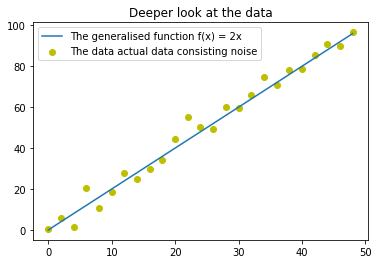

In [13]:
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


np.random.seed(2)

X = np.arange(0,10*5, 2)
y_generic = 2.*X
y = y_generic + np.random.normal(2, 4, len(y_generic))  # real life scenario data
X = X.reshape(-1,1)

plt.plot(X,y_generic, label='The generalised function f(x) = 2x')
plt.scatter(X,y, label ='The data actual data consisting noise' , c ='y')
plt.title('Deeper look at the data')
plt.legend()
plt.show()

**Noise of the data is the level to which it is random**

* **The yellow is the actual data we have**  
* **The blue of is the function best generalising our data**  
* **Why are they different?**
- to imitate the real life scenario where our data consist of some randomness.
    
**Example:**  
When buying a house worth 300k dollars you paid for it 302k cause you really liked the onwer.  
Let us say that I am buying a house worth 100k and I paid for it 97k.   
Your +2k and mine -3k are the "noise" of the data. No matter the noice the houses where worth respectively 300k and 100k, therefore it is desired that the function describing the house worth should still output 300k and 100k which were the actual prices of the houses not influenced by noise

**Let's divide our data into train set and test set using sklearn library**

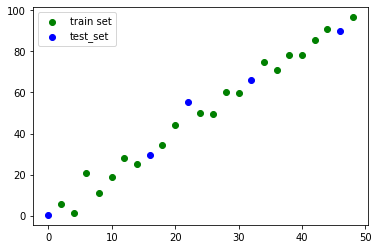

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)  # Split the data into Train(80%) and Test set(20%)
plt.scatter(X_train, y_train, label='train set', c='g')
plt.scatter(X_test, y_test, label='test_set', c='b')
plt.legend()

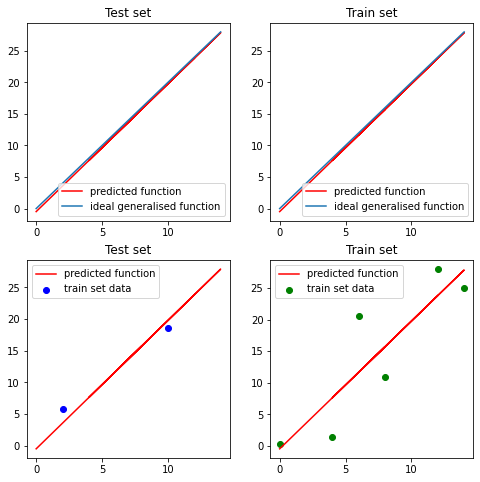

In [71]:
model = LinearRegression().fit(X_train,y_train)  # create the model and train it using train data

y_pred = model.predict(X_test)  # We have our model and then we can use it to predict something

b  = model.intercept_  # get the intercept (base value of the function)
w = model.coef_.T  # get the coeficient of the function

#Anything below just ignore, it's plotting

fig, axs = plt.subplots(2, 2)
fig.set_figheight(8)
fig.set_figwidth(8)
axs[0,0].plot(X_train,(b+w*X_train), label='predicted function', c='r')  # plot the predicted function
axs[0,0].plot(X,y_generic, label='ideal generalised function')
axs[0,0].set_title('Test set')
axs[0,0].legend()

axs[1,0].scatter(X_test,y_test, label='train set data', c='b')
axs[1,0].plot(X_train,(b+w*X_train), label='predicted function', c='r')
axs[1,0].set_title('Test set')
axs[1,0].legend()

axs[0,1].plot(X_train,(b+w*X_train), label='predicted function', c='r')  # plot the predicted function
axs[0,1].plot(X,y_generic, label='ideal generalised function')
axs[0,1].set_title('Train set')
axs[0,1].legend()

axs[1,1].scatter(X_train,y_train, label='train set data', c='g')
axs[1,1].plot(X_train,(b+w*X_train), label='predicted function', c='r')
axs[1,1].set_title('Train set')
axs[1,1].legend()

In [16]:
print(f' f(x) ={b} + {w[0]}x')
print(f'The test set score of this model is {overfitting_model.score(X_test,y_test)}%')
print(f'test set mean error of this model is {math.sqrt(mean_squared_error(y_pred,y_test))} per sample')

 f(x) =-0.3117477793259198 + 2.0451014719309524x
The test set score of this model is 0.9722106973758871%
test set mean error of this model is 5.135184749568037 per sample


# 4. Overfitting/Underfitting
![](https://gblobscdn.gitbook.com/assets%2F-LvBP1svpACTB1R1x_U4%2F-LvNWUoWieQqaGmU_gl9%2F-LvNoby-llz4QzAK15nL%2Fimage.png?alt=media&token=41720ce9-bb66-4419-9bd8-640abf1fc415)
Source: Sagar Sharma / Towards Data Science

**Noise of the data is the level to which it i random**

**Overfitting is when the machine learning model learn the randomness of the data instead of it's real function**
- Ovefitting: Good results on train set, bad results on test sets

**Optimum is when machine learning model succced to find the function, that almost represent the real data distrubution**
- Optimum: Good results on both

**Underfitting is when machine learning model uses too general function which leads to poor model**
- Underfitting: Bad results on both

### Let's get some more complicated data

Text(0.5, 1.0, 'Distribution of the entire data set')

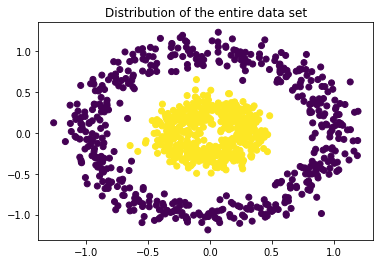

In [52]:
from sklearn.datasets import make_circles
data, labels = make_circles(n_samples=1000, 
                               shuffle=True, noise=0.1, random_state=None, factor=0.3)  # create some data in a circle

plt.scatter(data[:,0], data[:,1], c=labels)
plt.title("Distribution of the entire data set")

### Same like last time split into train and test set

In [53]:
data_train, data_test, labels_train, labels_test = train_test_split(
        data, labels, test_size=0.2, random_state=42)



No handles with labels found to put in legend.


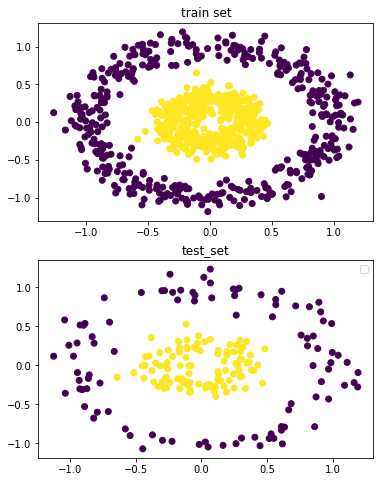

In [54]:
X_train = data_train[:,0]
X_test = data_test[:,0]
     
y_train = data_train[:,1]
y_test = data_test[:,1]                  

fig, axs = plt.subplots(2)
fig.set_figheight(8)
fig.set_figwidth(6)
axs[0].scatter(X_train, y_train, c=labels_train)
axs[0].set_title('train set')
axs[1].scatter(X_test, y_test, c=labels_test)
axs[1].set_title('test_set')
axs[1].legend()


### And this time let's use logistic regression to present underfitting

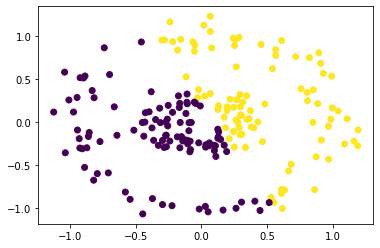

In [55]:
from sklearn.linear_model import LogisticRegression as LR

model = LR().fit(data_train, labels_train)

y_pred = model.predict(data_test)

plt.scatter(data_test[:,0], data_test[:,1], c=y_pred)

In [56]:
test_score = model.score(data_test, labels_test)
print(f'Test set score for the logistic regression: {test_score}')
train_score = model.score(data_train, labels_train)
print(f'Train set score for the logistic regression: {train_score}')

Test set score for the logistic regression: 0.395
Train set score for the logistic regression: 0.4825


### We can see that the result is poor for both of them therefore it is underfitting
**What we can do then is to increase the complexity for the model**
**A popular thing to do when working with a Model is to create new more complex features, let's do a small example**

data_train, data_test, labels_train, labels_test = train_test_split(
        data, labels, test_size=0.2, random_state=42)



**Let's add new features x^2 and y^2**

In [57]:
data_square = np.square(data)
complex_data = np.column_stack([data, data_square])

In [58]:
data_train, data_test, labels_train, labels_test = train_test_split(
        complex_data, labels, test_size=0.2, random_state=42)



### Logistic Regression with complex data

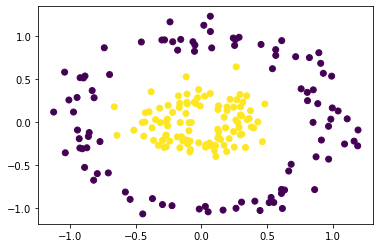

In [59]:
model = LR().fit(data_train, labels_train)

y_pred = model.predict(data_test)

plt.scatter(data_test[:,0], data_test[:,1], c=y_pred)

In [51]:
test_score = model.score(data_test, labels_test)
print(f'Test set score for the logistic regression: {test_score}')
train_score = model.score(data_train, labels_train)
print(f'Train set score for the logistic regression: {train_score}')

Test set score for the logistic regression: 1.0
Train set score for the logistic regression: 0.99875


### WoW! Amazing, we manage to create a Balanced model

### Now let's attempt to get rid of overfitting

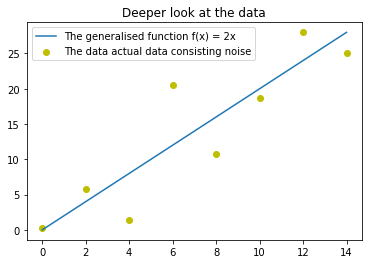

In [68]:
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


np.random.seed(2)

X = np.arange(0,10*1.5, 2)
y_generic = 2.*X
y = y_generic + np.random.normal(2, 4, len(y_generic))  # real life scenario data
X = X.reshape(-1,1)

plt.plot(X,y_generic, label='The generalised function f(x) = 2x')
plt.scatter(X,y, label ='The data actual data consisting noise' , c ='y')
plt.title('Deeper look at the data')
plt.legend()
plt.show()

### Add a lot of features

In [69]:
X2, X3 = X**2, X**3
X4, X5 = X**4, X**5
X6, X7 = X**6, X**7
X8, X9 = X**8, X**9
complex_data = np.column_stack([X,X2,X3,X4,X5,X6,X7,X8,X9])

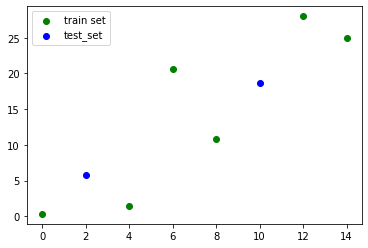

In [75]:
X_train, X_test, y_train, y_test = train_test_split(
        complex_data, y, test_size=0.2, random_state=42)  # Split the data into Train(80%) and Test set(20%)
plt.scatter(X_train[:,0], y_train, label='train set', c='g')
plt.scatter(X_test[:,0], y_test, label='test_set', c='b')
plt.legend()

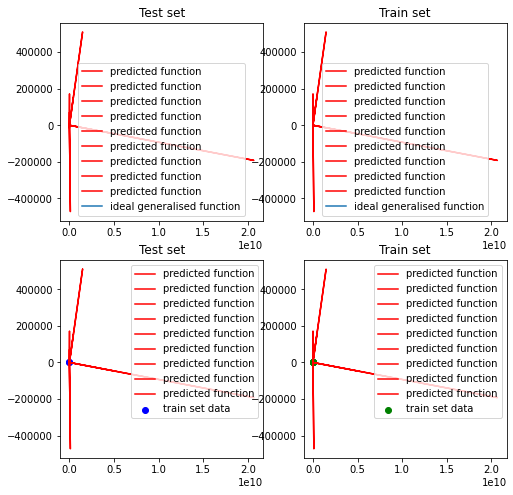

In [78]:
model = LinearRegression().fit(X_train,y_train)  # create the model and train it using train data

y_pred = model.predict(X_test)  # We have our model and then we can use it to predict something

b  = model.intercept_  # get the intercept (base value of the function)
w = model.coef_.T  # get the coeficient of the function

#Anything below just ignore, it's plotting

fig, axs = plt.subplots(2, 2)
fig.set_figheight(8)
fig.set_figwidth(8)
axs[0,0].plot(X_train,(b+w*X_train), label='predicted function', c='r')  # plot the predicted function
axs[0,0].plot(X,y_generic, label='ideal generalised function')
axs[0,0].set_title('Test set')
axs[0,0].legend()

axs[1,0].scatter(X_test[:,0],y_test, label='train set data', c='b')
axs[1,0].plot(X_train,(b+w*X_train), label='predicted function', c='r')
axs[1,0].set_title('Test set')
axs[1,0].legend()

axs[0,1].plot(X_train,(b+w*X_train), label='predicted function', c='r')  # plot the predicted function
axs[0,1].plot(X,y_generic, label='ideal generalised function')
axs[0,1].set_title('Train set')
axs[0,1].legend()

axs[1,1].scatter(X_train[:,0],y_train, label='train set data', c='g')
axs[1,1].plot(X_train,(b+w*X_train), label='predicted function', c='r')
axs[1,1].set_title('Train set')
axs[1,1].legend()